In [ ]:
%cd /content/drive/MyDrive/Super resolution

/content/drive/MyDrive/Super resolution


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%pwd


'/content/drive/MyDrive/Super resolution'

In [ ]:
!git clone https://github.com/xinntao/ESRGAN.git

Cloning into 'ESRGAN'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 225 (delta 86), reused 219 (delta 84), pack-reused 0 (from 0)
Receiving objects: 100% (225/225), 24.86 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
%cd /content/drive/MyDrive/Super resolution/ESRGAN

/content/drive/MyDrive/Super resolution/ESRGAN


In [ ]:
%ls

figures/  LR/      net_interp.py  README.md  RRDBNet_arch.py  transer_RRDB_models.py
LICENSE   models/  QA.md          results/   test.py


In [ ]:
!pip install --upgrade scikit-image

In [ ]:
%pwd

'/content/drive/MyDrive/Super resolution/ESRGAN'

In [ ]:
%cd Super resolution


[Errno 2] No such file or directory: 'Super resolution'
/content


In [ ]:
!python test.py

python3: can't open file '/content/test.py': [Errno 2] No such file or directory


In [ ]:
%cd /content/drive/MyDrive/Super resolution/ESRGAN

/content/drive/MyDrive/Super resolution/ESRGAN


In [ ]:
!python test.py

/content/drive/MyDrive/Super resolution/ESRGAN/test.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path), strict=True)
Model pat

In [ ]:
!pip install opencv-python


In [ ]:
import cv2
import numpy as np


In [ ]:
def calculate_psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr


In [ ]:
original = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/LR/FLIR4339.jpg')
compressed = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/results/FLIR4339_rlt.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
compressed = cv2.cvtColor(compressed, cv2.COLOR_BGR2GRAY)


In [ ]:
original = cv2.resize(original, (compressed.shape[1], compressed.shape[0]))
psnr_value = calculate_psnr(original, compressed)
print(f"PSNR value is {psnr_value} dB")


PSNR value is 39.806741498389485 dB


In [ ]:
#normal to bicubic
original = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/normal image/FLIR4339.jpg')
compressed = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/normal image/bic5.jpg')

original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
compressed = cv2.cvtColor(compressed, cv2.COLOR_BGR2GRAY)

original = cv2.resize(original, (compressed.shape[1], compressed.shape[0]))

psnr_value = calculate_psnr(original, compressed)
print(f"PSNR value of bicubic is {psnr_value} dB")

PSNR value of bicubic is 39.806741498389485 dB


In [ ]:
#normal to bilinear

original = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/normal image/FLIR4339.jpg')
compressed = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/normal image/bil5.jpg')

original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
compressed = cv2.cvtColor(compressed, cv2.COLOR_BGR2GRAY)

original = cv2.resize(original, (compressed.shape[1], compressed.shape[0]))

psnr_value = calculate_psnr(original, compressed)
print(f"PSNR value of bilinear is {psnr_value} dB")

PSNR value of bilinear is 39.614744658973926 dB


In [ ]:
#normal to nearest neighbour

original = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/normal image/FLIR4339.jpg')
compressed = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/normal image/nn5.jpg')

original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
compressed = cv2.cvtColor(compressed, cv2.COLOR_BGR2GRAY)

original = cv2.resize(original, (compressed.shape[1], compressed.shape[0]))

psnr_value = calculate_psnr(original, compressed)
print(f"PSNR value of nearest neighbour is {psnr_value} dB")

PSNR value of nearest neighbour is 39.51144209234508 dB


In [ ]:
# bicubic to esrgan

original = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/normal image/bic5.jpg')
compressed = cv2.imread('/content/drive/MyDrive/Super resolution/ESRGAN/results/FLIR4339_rlt.png')

original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
compressed = cv2.cvtColor(compressed, cv2.COLOR_BGR2GRAY)

original = cv2.resize(original, (compressed.shape[1], compressed.shape[0]))

psnr_value = calculate_psnr(original, compressed)
print(f"PSNR value of bicubic to esrgan is {psnr_value} dB")

PSNR value of bicubic to esrgan is 37.56161271816173 dB


In [ ]:


!pip install scikit-image
from skimage.metrics import structural_similarity as ssim
import cv2
import matplotlib.pyplot as plt

# Function to compute SSIM
def calculate_ssim(image1_path, image2_path):
    # Load the images
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # Check if images are loaded correctly
    if image1 is None or image2 is None:
        raise ValueError("Could not load one or both of the images. Check the file paths.")

    # Calculate SSIM
    score, diff = ssim(image1, image2, full=True)
    diff = (diff * 255).astype("uint8")

    print(f"SSIM: {score:.4f}")

    # Plot the images and the difference map
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title("Input Image")
    axes[0].axis("off")

    axes[1].imshow(image2, cmap='gray')
    axes[1].set_title("Output Image")
    axes[1].axis("off")

    axes[2].imshow(diff, cmap='gray')
    axes[2].set_title("Difference Map")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

# Paths for input and output images
input_image_path = "/content/drive/MyDrive/Super resolution/ESRGAN/LR/FLIR4339.jpg"
output_image_path = "/content/drive/MyDrive/Super resolution/ESRGAN/normal image/bic5.jpg"

# Call the function
calculate_ssim(input_image_path, output_image_path)


ValueError: Input images must have the same dimensions.

SSIM of bicubic : 0.9389


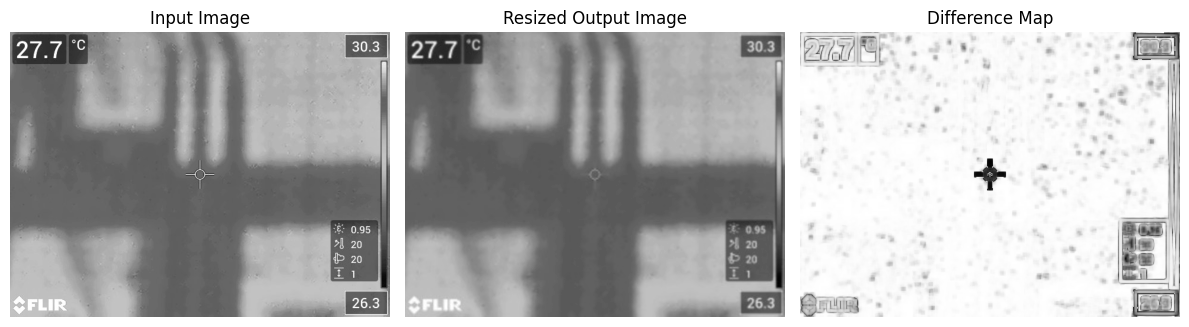

In [ ]:
#normal img to bicubic ssim value

!pip install scikit-image
from skimage.metrics import structural_similarity as ssim
import cv2
import matplotlib.pyplot as plt

def calculate_ssim(image1_path, image2_path):
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    if image1 is None or image2 is None:
        raise ValueError("Could not load one or both of the images. Check the file paths.")

    image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
    score, diff = ssim(image1, image2_resized, full=True)
    diff = (diff * 255).astype("uint8")

    print(f"SSIM: {score:.4f}")
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title("Input Image")
    axes[0].axis("off")

    axes[1].imshow(image2_resized, cmap='gray')
    axes[1].set_title("Resized Output Image")
    axes[1].axis("off")

    axes[2].imshow(diff, cmap='gray')
    axes[2].set_title("Difference Map")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

input_image_path = "/content/drive/MyDrive/Super resolution/ESRGAN/LR/FLIR4339.jpg"
output_image_path = "/content/drive/MyDrive/Super resolution/ESRGAN/normal image/bic5.jpg"

calculate_ssim(input_image_path, output_image_path)
